# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [250]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame. Using the default, inner join. 
lab_data_complete= pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview.
lab_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [251]:
# Checking the number of mice.
mouse_count= len(lab_data_complete["Mouse ID"].unique())
mouse_count

249

In [252]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_rows=lab_data_complete[lab_data_complete.duplicated(["Mouse ID", "Timepoint"])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=duplicate_rows["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [253]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df= lab_data_complete.loc[lab_data_complete["Mouse ID"] == "g989",["Mouse ID","Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [254]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df=lab_data_complete.drop(lab_data_complete[lab_data_complete["Mouse ID"] == "g989"].index)
updated_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [255]:
# Checking the number of mice in the clean DataFrame.
updated_mouse_count= len(updated_df["Mouse ID"].unique())
updated_mouse_count

248

## Summary Statistics

In [256]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Specify numeric_only to ensure that only numeric columns are used to calculate the variance, standard deviation, and standard error.
mean_tumor_volume = lab_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = lab_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume = lab_data_complete.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
std_tumor_volume = lab_data_complete.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
sem_tumor_volume = lab_data_complete.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics= pd.DataFrame(
    {"Mean Tumor Volume" : mean_tumor_volume,
     "Median Tumor Volume" : median_tumor_volume,
     "Tumor Volume Variance" : variance_tumor_volume,
     "Tumor Volume Std. Dev." : std_tumor_volume,
     "Tumor Volume Std. Err." : sem_tumor_volume
    }
)

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [257]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary_stats = lab_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean",
    "median", 
    "var", 
    "std", 
    "sem"])

aggregated_summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

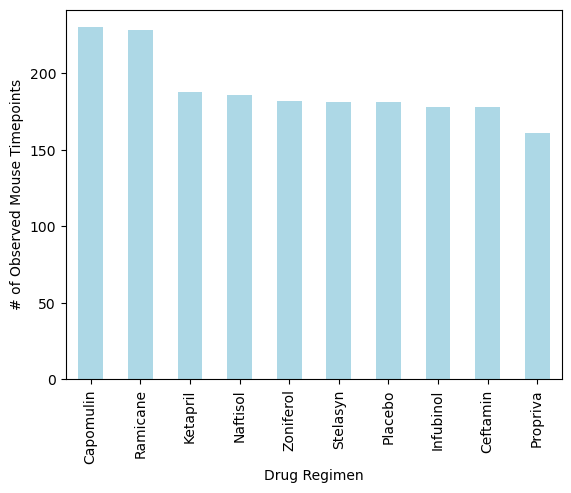

In [258]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = lab_data_complete["Drug Regimen"].value_counts()

# Plot the counts as a bar chart
counts.plot(kind="bar", color="lightblue")

# Create the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()

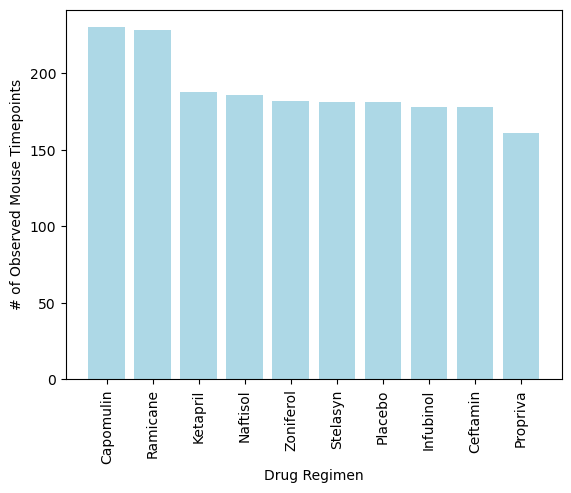

In [259]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = lab_data_complete["Drug Regimen"].value_counts()
x_axis = counts.index
y_axis = counts.values

# Create the bar plot
plt.bar(x_axis, y_axis, color="lightblue")   

# Add labels and make the x-axis label easier to read
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

# Show the plot
plt.show()

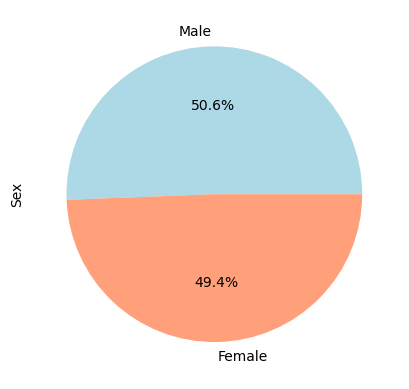

In [260]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = lab_data_complete["Sex"].value_counts()
gender.plot(kind="pie", colors=["lightblue","#FFA07A"], autopct="%1.1f%%")
plt.show()

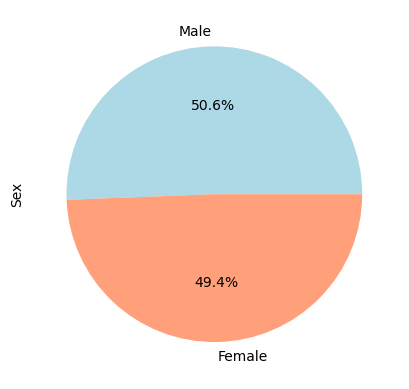

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = lab_data_complete["Sex"].value_counts()
labels= gender.index
colors = ["lightblue","#FFA07A"]
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [310]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol =lab_data_complete.groupby("Mouse ID")["Tumor Volume (mm3)"].last()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = lab_data_complete.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_lab_df = pd.merge(lab_data_complete, last_timepoint, on="Mouse ID")
merged_lab_df = pd.merge(merged_lab_df, final_tumor_vol, on="Mouse ID")

#Rename the columns after merging to make it easier to understand
merged_lab_df = merged_lab_df.rename(columns={"Timepoint_y": "Last Timepoint", "Tumor Volume (mm3)_y": "Final Tumor Volume"})
merged_lab_df


,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Final Tumor Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,45,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,45,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,45,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,45,38.982878
...,...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,45,28.430964
1889,m601,30,31.758275,1,Capomulin,Male,22,17,45,28.430964
1890,m601,35,30.834357,1,Capomulin,Male,22,17,45,28.430964
1891,m601,40,31.378045,1,Capomulin,Male,22,17,45,28.430964


In [300]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
  
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_rows = merged_lab_df.loc[merged_lab_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)_x"]

    # add subset
    tumor_vol_data.append(mice_rows)

    # Determine outliers using upper and lower bounds
    quartiles = merged_lab_df["Final Tumor Volume"].quantile([0.25, 0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #outliers = mice_rows.loc(Final Tumor Volume< lower_bound) | (Final Tumor Volume > upper_bound)]
    outliers = mice_rows.loc[(mice_rows < lower_bound) | (mice_rows > upper_bound)]

    # Print the outliers for each treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


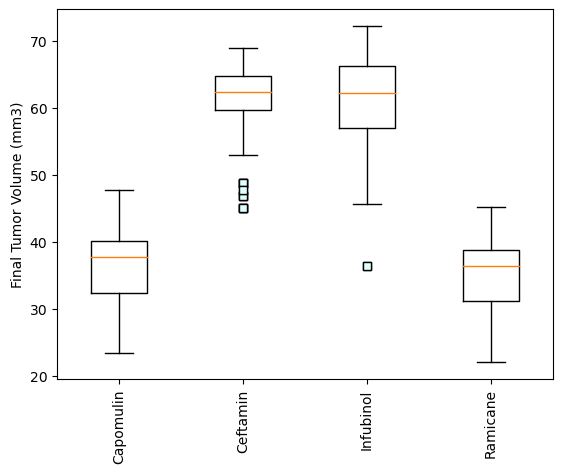

In [309]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
merged_lab_df_filtered = merged_lab_df[merged_lab_df["Drug Regimen"].isin(treatment_names)]
distribution = merged_lab_df_filtered.groupby("Drug Regimen")["Final Tumor Volume"].apply(list).to_dict()
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(distribution.values(), flierprops=dict(marker="s", markerfacecolor="lightcyan"))
ax1.set_xticklabels(distribution.keys(), rotation=90)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

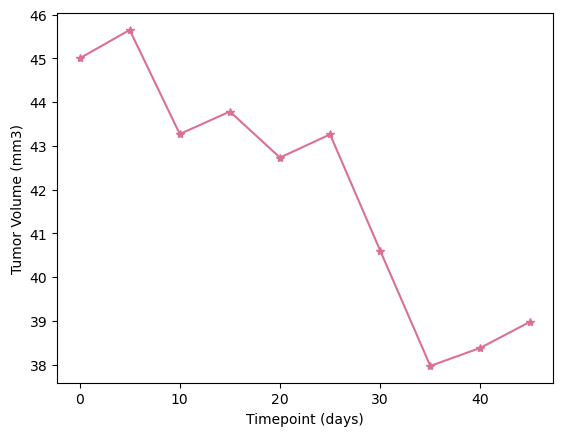

In [265]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse= merged_lab_df[(merged_lab_df["Mouse ID"] == "b128") & (merged_lab_df["Drug Regimen"] == "Capomulin")]
plt.plot(single_mouse["Timepoint_x"], single_mouse["Tumor Volume (mm3)_x"], color= "palevioletred", marker="*")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

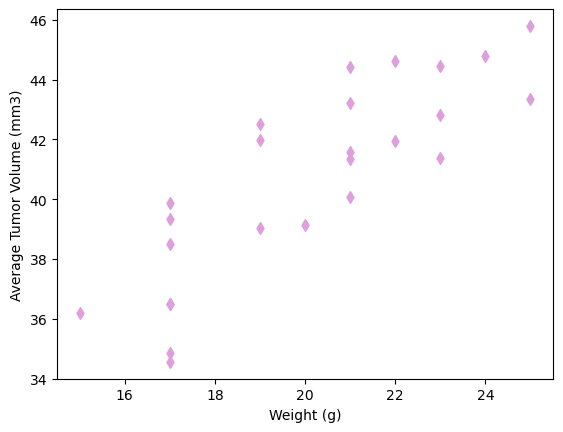

In [266]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_lab_df[merged_lab_df["Drug Regimen"] == "Capomulin"]
weight=capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
tumor =capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)_x"].mean()
plt.scatter(weight,tumor, color="plum", marker="d")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

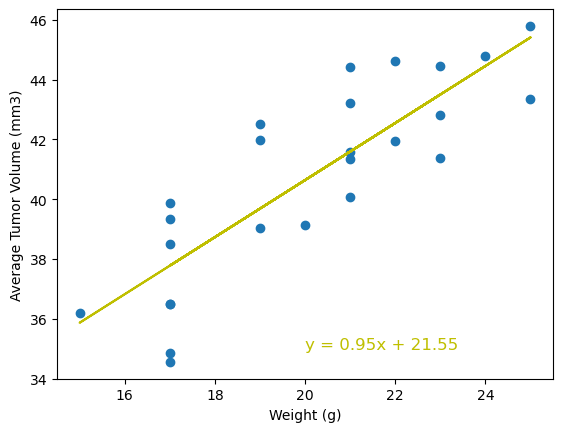

The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is 0.84


In [267]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight=capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
tumor =capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)_x"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values, "y-")
plt.annotate(line_eq, (20, 35), fontsize=12, color="y")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is {round(rvalue, 2)}")